In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from WhatsappFlirtclass import WhatsappFlirt

In [2]:
dataset=pd.read_csv("mabel.txt",header=None,on_bad_lines="skip",encoding="utf-8")
dataset.head(5)

,0,1
0,05/12/19,1:42 pm - Messages to this chat and calls are...
1,05/12/19,1:42 pm - Mabel Infoziant: Hi this is Mabel w...
2,05/12/19,1:42 pm - Mabel Infoziant: What’s your full name
3,05/12/19,1:42 pm - AR❤: Ramisha Rani K
4,05/12/19,1:42 pm - Mabel Infoziant: Ok


In [3]:
dataset=dataset.drop(0)
dataset.columns=["Date","Chat"]

In [4]:
split_time=dataset["Chat"].str.split("-",n=1,expand=True)
split_time.head(3)

,0,1
1,1:42 pm,Mabel Infoziant: Hi this is Mabel we just spoke
2,1:42 pm,Mabel Infoziant: What’s your full name
3,1:42 pm,AR❤: Ramisha Rani K


In [5]:
dataset["Time"]=split_time[0]
dataset.head(3)

,Date,Chat,Time
1,05/12/19,1:42 pm - Mabel Infoziant: Hi this is Mabel w...,1:42 pm
2,05/12/19,1:42 pm - Mabel Infoziant: What’s your full name,1:42 pm
3,05/12/19,1:42 pm - AR❤: Ramisha Rani K,1:42 pm


In [6]:
split_name=split_time[1].str.split(":",n=1,expand=True)
split_name.head(3)

,0,1
1,Mabel Infoziant,Hi this is Mabel we just spoke
2,Mabel Infoziant,What’s your full name
3,AR❤,Ramisha Rani K


In [7]:
dataset=dataset.drop("Chat",axis=1)
dataset.head(3)

,Date,Time
1,05/12/19,1:42 pm
2,05/12/19,1:42 pm
3,05/12/19,1:42 pm


In [8]:
dataset["Name"]=split_name[0]
dataset["Chat"]=split_name[1]
dataset.head(5)

,Date,Time,Name,Chat
1,05/12/19,1:42 pm,Mabel Infoziant,Hi this is Mabel we just spoke
2,05/12/19,1:42 pm,Mabel Infoziant,What’s your full name
3,05/12/19,1:42 pm,AR❤,Ramisha Rani K
4,05/12/19,1:42 pm,Mabel Infoziant,Ok
5,05/12/19,1:42 pm,Mabel Infoziant,ramisharanik@gmail.com


In [9]:
final_dataset=dataset

In [10]:
def sentiment(data,col_name):
    sia=SentimentIntensityAnalyzer()
    data['Scores']=data[col_name].apply(lambda chat_text : sia.polarity_scores(chat_text))
    data['Compound']=data['Scores'].apply(lambda chat_scores : chat_scores['compound'])
    data['Negative']=data['Scores'].apply(lambda chat_scores : chat_scores['neg'])
    data['Positive']=data['Scores'].apply(lambda chat_scores : chat_scores['pos'])
    data['Neutral']=data['Scores'].apply(lambda chat_scores : chat_scores['neu'])
    data['Comp_scores']=data['Compound'].apply(lambda c:'Pos' if c>=0 else 'Neg')
    posneg_dataframe=pd.DataFrame(data['Comp_scores'].value_counts())
    return posneg_dataframe,data                                          
    

In [11]:
pos,data=sentiment(final_dataset,col_name="Chat")
pos

,count
Comp_scores,
Pos,48
Neg,2


In [12]:
def topic_model(tfidf_model):
    LDA=LatentDirichletAllocation(n_components=5,random_state=42)
    LDA_model=LDA.fit(tfidf_model)
    for index,topic in enumerate(LDA_model.components_):
        result=([tfidf.get_feature_names_out()[i] for i in topic.argsort()[-10 :]])
        print(result)
    topic_results=LDA_model.transform(tfidf_model)
    dataset["Topic"]=topic_results.argmax(axis=1) 

In [13]:
 tfidf=TfidfVectorizer(max_df=0.95,min_df=2,stop_words='english')
 tfidf_model=tfidf.fit_transform(final_dataset["Chat"]) 
 topic_model(tfidf_model)

['number', 'need', 'yes', 'hi', 'just', 'office', 'send', 'details', 'vignesh', 'ml']
['meeting', 'soon', 'ramisha', 'number', 'office', 'phone', 'students', 'yes', 'need', 'ok']
['ask', 'project', 'think', 'read', 'abstract', 'sure', 'kk', 'finiliaze', 'yeah', 'mam']
['soon', 'ask', 'mam', 'office', 'just', 'know', 'church', 'meeting', 'project', 'tomorrow']
['details', 'yes', 'ask', 'mam', 'send', 'church', 'ramisha', 'hi', 'start', 'abstracts']


In [14]:
dataset

,Date,Time,Name,Chat,Scores,Compound,Negative,Positive,Neutral,Comp_scores,Topic
1,05/12/19,1:42 pm,Mabel Infoziant,Hi this is Mabel we just spoke,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,Pos,0
2,05/12/19,1:42 pm,Mabel Infoziant,What’s your full name,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,Pos,0
3,05/12/19,1:42 pm,AR❤,Ramisha Rani K,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,Pos,4
4,05/12/19,1:42 pm,Mabel Infoziant,Ok,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.2960,0.000,1.000,0.000,Pos,1
5,05/12/19,1:42 pm,Mabel Infoziant,ramisharanik@gmail.com,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,Pos,0
6,05/12/19,1:43 pm,Mabel Infoziant,Your email Id?,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,Pos,0
7,05/12/19,1:43 pm,AR❤,Yes Mam,"{'neg': 0.0, 'neu': 0.27, 'pos': 0.73, 'compou...",0.4019,0.000,0.730,0.270,Pos,1
8,05/12/19,1:43 pm,Mabel Infoziant,I will send 2 abstracts for u to start working,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,Pos,4
9,05/12/19,1:43 pm,AR❤,Yeah mam,"{'neg': 0.0, 'neu': 0.312, 'pos': 0.688, 'comp...",0.2960,0.000,0.688,0.312,Pos,2
10,05/12/19,1:43 pm,Mabel Infoziant,Give me the list that u have too,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,Pos,0


In [15]:
dataset["Topic"].value_counts()

Topic
2    16
0    14
1    10
4     6
3     4
Name: count, dtype: int64

In [16]:
#!pip install emoji

In [17]:
objwhatsapp=WhatsappFlirt()

In [18]:
objwhatsapp.whole_process(final_dataset)

Most Talkative Person :  AR❤
Less Talkative Person :  MABEL INFOZIANT
Flirting Percentage of  AR❤: 0.96 %
Flirting Percentage of  MABEL INFOZIANT: 0.46 %


{'Talker': {'Name': ' AR❤',
  'Flirting_Score': 0.96,
  'Filtered_Words':     Repeated_count  Flirt_Frequency
  Kk               2         0.961538},
 'Lesser_Talker': {'Name': ' MABEL INFOZIANT',
  'Flirting_Score': 0.46,
  'Filtered_Words':      Repeated_count  Flirt_Frequency
  hot               1         0.460829}}

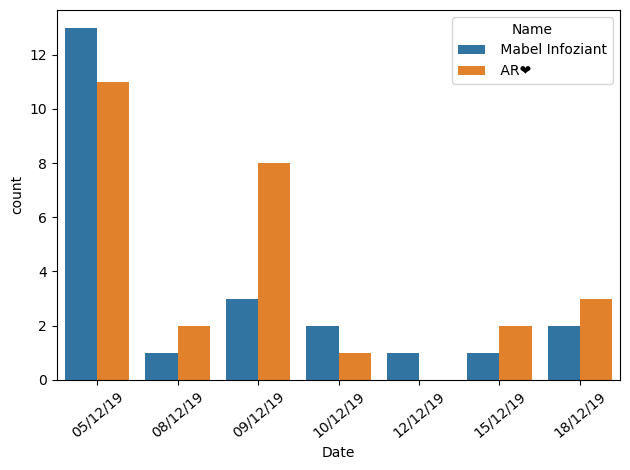

{'date_chart':           count
 Date           
 05/12/19     24
 09/12/19     11
 18/12/19      5
 08/12/19      3
 10/12/19      3
 15/12/19      3
 12/12/19      1,
 'media_count': Empty DataFrame
 Columns: []
 Index: [],
 'deleted_count': Empty DataFrame
 Columns: []
 Index: [],
 'voice_call_count': Empty DataFrame
 Columns: []
 Index: [],
 'video_call_count': Empty DataFrame
 Columns: []
 Index: [],
 'summary_stats': {'Most Active Date': '05/12/19',
  'Active Weekday': 'Sunday',
  'Most Active Time': ' 1:43 pm ',
  'Avg Messages Per Day': 7},
 'freaks': {'Media Share Freak': 'No Media Shared',
  'Message Deletion Freak': 'No Message Deleted',
  'Voice Call Freak': 'No Missed Voice Call',
  'Video Call Freak': 'No Missed Video Call'}}

In [20]:
objwhatsapp.statsWhatsApp(dataset)